# ***MNIST DNN***

In [0]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import tensorflow as tf

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [0]:
mnist=input_data.read_data_sets('/content/drive/My Drive/Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /content/drive/My Drive/Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /content/drive/My Drive/Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /content/drive/My Drive/Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /content/drive/My Drive/Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/

In [0]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [0]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
mnist.train.num_examples

55000

In [0]:
mnist.test.num_examples

10000

In [0]:
import matplotlib.pyplot as plt

In [0]:
single_image=mnist.train.images[1].reshape(28,28)

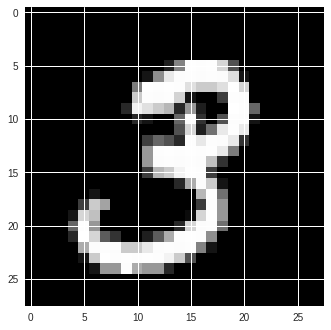

In [0]:
plt.imshow(single_image,cmap='gist_gray')
plt.show()

In [0]:
single_image.min()

0.0

In [0]:
single_image.max()

1.0

In [0]:
# PLACEHOLDERS
x=tf.placeholder(tf.float32,shape=[None,784])

# VARIABLES
W=tf.Variable(tf.zeros([784,10]))
b=tf.Variable(tf.zeros([10]))

# CREATE GRAPH OPERATION
y=tf.add(tf.matmul(x,W),b)

# LOSS FUNCTION
y_true=tf.placeholder(tf.float32,[None,10])
cross_entropy=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y))

# OPTIMIZER
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.5)
train=optimizer.minimize(cross_entropy)

#INITIALIZE VARIABLES
init=tf.global_variables_initializer()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
# CREATE SESSION
with tf.Session() as session:
  session.run(init)
  
  for step in range(1000):
    batch_x,batch_y=mnist.train.next_batch(100)
    session.run(train,feed_dict={x:batch_x,y_true:batch_y})
    
  # EVALUATE THE MODEL
  correct_prediction=tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
  
  # [TRUE,FALSE,TRUE...] ---> [1,0,1...]
  acc=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
  
  # PREDICTED [3,4] TRUE [3,9]
  # [TRUE, FALSE]
  # [1.0, 0.0]
  # 0.5
  
  print(session.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))

0.919
